Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [51]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import mlutils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Alen Carin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly', 'pinv', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [52]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [53]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

accuracy: 1.0


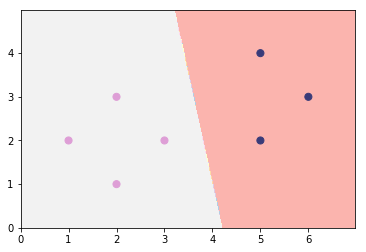

In [54]:
clf = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
y_pred = clf.predict(seven_X)
print("accuracy:", accuracy_score(seven_y, y_pred))
mlutils.plot_2d_clf_problem(seven_X, seven_y, clf.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

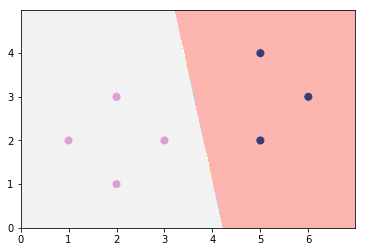

In [55]:
clf = LinearRegression().fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : clf.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [56]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

accuracy: 0.875


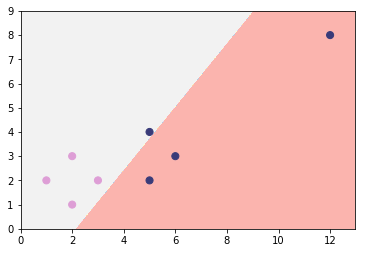

In [57]:
clf = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
print("accuracy:", accuracy_score(outlier_y, clf.predict(outlier_X)))
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [58]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

accuracy: 0.875


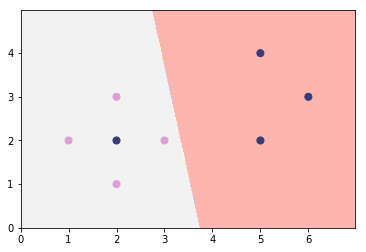

In [59]:
clf = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
y_pred = clf.predict(unsep_X)
print("accuracy:", accuracy_score(unsep_y, y_pred))
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, clf.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

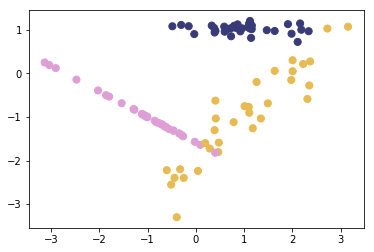

In [60]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
mlutils.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [61]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

In [62]:
y1 = (y == 0).astype(int)
y2 = (y == 1).astype(int)
y3 = (y == 2).astype(int)

In [63]:
#poly = PolynomialFeatures(1)
#fi = poly.fit_transform(X)
pinv = np.linalg.pinv(X)

w1 = np.dot(pinv, y1)
w2 = np.dot(pinv, y2)
w3 = np.dot(pinv, y3)


def h1(x):
    return np.dot(w1.T, x)
    
def h2(x):
    return np.dot(w2.T, x)

def h3(x):
    return np.dot(w3.T, x)

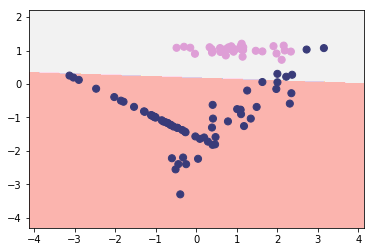

In [64]:
#mlutils.plot_2d_clf_problem(X, y1, lambda x : h1(x) >= 0.5)
clf = LinearRegression().fit(X, y1)
mlutils.plot_2d_clf_problem(X, y1, lambda x : clf.predict(x) >= 0.5)

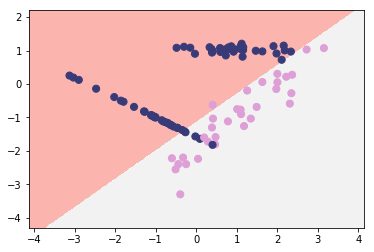

In [65]:
#mlutils.plot_2d_clf_problem(X, y2, lambda x : h2(x) >= 0.5)
clf = LinearRegression().fit(X, y2)
mlutils.plot_2d_clf_problem(X, y2, lambda x : clf.predict(x) >= 0.5)

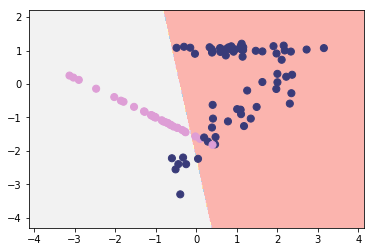

In [66]:
#mlutils.plot_2d_clf_problem(X, y3, lambda x : h3(x) >= 0.5)
clf = LinearRegression().fit(X, y3)
mlutils.plot_2d_clf_problem(X, y3, lambda x : clf.predict(x) >= 0.5)

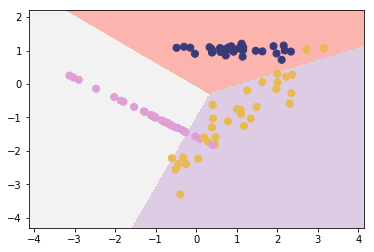

In [67]:
clf1 = LinearRegression().fit(X, y1)
clf2 = LinearRegression().fit(X, y2)
clf3 = LinearRegression().fit(X, y3)

def predict(x):
    return argmax([clf1.predict(x.reshape(1, -1)), clf2.predict(x.reshape(1, -1)), clf3.predict(x.reshape(1, -1))])

mlutils.plot_2d_clf_problem(X, y, predict)

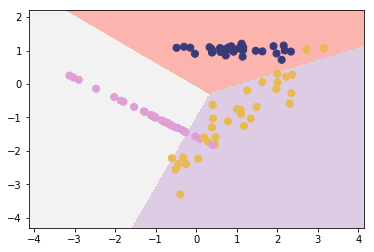

In [68]:
clf = RidgeClassifier(alpha=0).fit(X, y)
mlutils.plot_2d_clf_problem(X, y, clf.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [69]:
def sigm(x, alpha=1):
    return 1 / (1 + np.exp(-alpha * x))

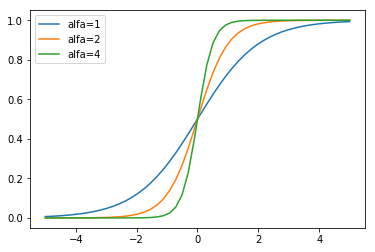

In [70]:
X = np.linspace(-5, 5)

plot(X, sigm(X, alpha=1), label="alfa=1")
plot(X, sigm(X, alpha=2), label="alfa=2")
plot(X, sigm(X, alpha=4), label="alfa=4")
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss

def lr_h(x,w):
    fi = PolynomialFeatures(1).fit_transform(x.reshape(1,-1))
    return sigm(np.dot(fi, w))


def cross_entropy_error(X, y, w):
    sum = 0
    N = shape(y)[0]
    
    for i in range(N):
        h = lr_h(X[i], w)
        sum = sum - y[i] * np.log(h) - (1 - y[i]) * np.log(1 - h)
    return sum / N

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    w_ = np.zeros(shape(X)[1] + 1)
    w_list = []
    err = epsilon**-1
    counter = 0
    
    while counter != max_iter:
        delta_w = np.zeros(shape(X)[1])
        delta_w0 = 0
        cur_iter_err = 0
        
        for i in range(len(y)):
            h = lr_h(X[i], w_)
            delta_w0 += h - y[i]
            delta_w += (h - y[i]) * X[i]
            
        cur_iter_err = cross_entropy_error(X, y, w_)
        
        if abs(err - cur_iter_err) < epsilon:
            print("Broj iteracija: ", counter)
            break
            
        err = cur_iter_err
        w_[0] -= eta * delta_w0
        w_[1:] = w_[1:] * (1 - eta * alpha) - eta * delta_w
        
        w_list.append(np.array(w_))
        counter += 1
        
    if trace:
        return w_, np.array(w_list)
    return w_

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Broj iteracija:  947
[0.13521873]


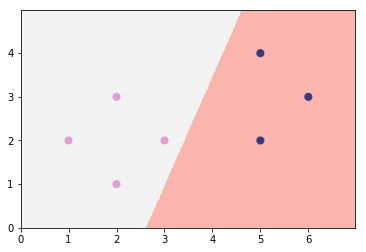

In [72]:
w = lr_train(seven_X, seven_y)
error = cross_entropy_error(seven_X, seven_y, w)
print(error)

mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [73]:
from sklearn.metrics import zero_one_loss

def zero_one_error(X, y, w):
    fi = PolynomialFeatures(1).fit_transform(X)
    return zero_one_loss(y, sigm(fi.dot(w)) >= 0.5)

Broj iteracija:  947


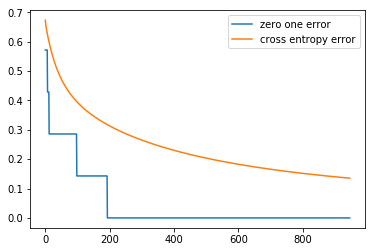

In [74]:
from sklearn.preprocessing import PolynomialFeatures

w, w_list = lr_train(seven_X, seven_y, trace=True)
cross_entropy_err = []
zero_one_err = []

for weight in w_list:
    cross_entropy_err.append(cross_entropy_error(seven_X, seven_y, weight))
    zero_one_err.append(zero_one_error(seven_X, seven_y, weight))
    
plot(np.arange(len(zero_one_err)), zero_one_err, label='zero one error')
plot(np.arange(len(cross_entropy_err)), cross_entropy_err, label='cross entropy error')
legend()

Broj iteracija:  1142
Broj iteracija:  947
Broj iteracija:  511
Broj iteracija:  378


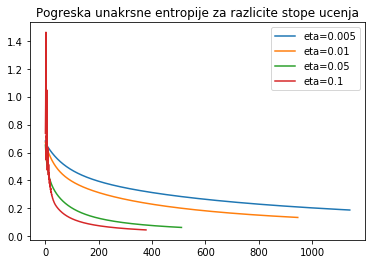

In [75]:
w1, w_list1 = lr_train(seven_X, seven_y, eta=0.005, trace=True)
w2, w_list2 = lr_train(seven_X, seven_y, eta=0.01, trace=True)
w3, w_list3 = lr_train(seven_X, seven_y, eta=0.05, trace=True)
w4, w_list4 = lr_train(seven_X, seven_y, eta=0.1, trace=True)

def compute_cross_entropy_error(w_list):
    err = []
    for i in range(len(w_list)):
        err.append(cross_entropy_error(seven_X, seven_y, w_list[i]))
    return err

err1 = compute_cross_entropy_error(w_list1)
err2 = compute_cross_entropy_error(w_list2)
err3 = compute_cross_entropy_error(w_list3)
err4 = compute_cross_entropy_error(w_list4)
    
plot(np.arange(len(cross_entropy_err1)), cross_entropy_err1, label='eta=0.005')
plot(np.arange(len(cross_entropy_err2)), cross_entropy_err2, label='eta=0.01')
plot(np.arange(len(cross_entropy_err3)), cross_entropy_err3, label='eta=0.05')
plot(np.arange(len(cross_entropy_err4)), cross_entropy_err4, label='eta=0.1')
title('Pogreska unakrsne entropije za razlicite stope ucenja')
legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [76]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000, solver='sag', multi_class='multinomial').fit(seven_X, seven_y)
print(clf.score(seven_X, seven_y))

1.0


### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

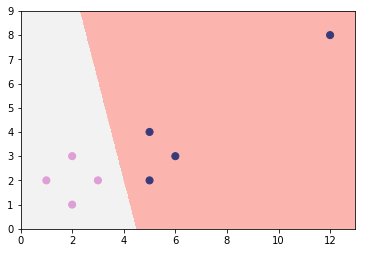

In [77]:
clf = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial').fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


Broj iteracija:  947


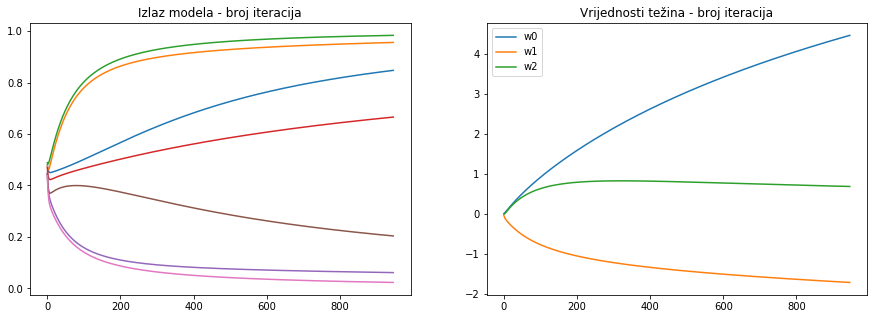

In [78]:
w, w_list = lr_train(seven_X, seven_y, trace=True)
h_list = []

for weights in w_list:
    h_seven = []
    for i in range(shape(seven_y)[0]):
        h_seven.append(lr_h(seven_X[i], weights))
    h_list.append(h_seven)

h_array = np.array(h_list)

figure(figsize=(15, 5))

subplot(1, 2, 1)
for i in range(shape(h_array)[1]):
    plot(np.arange(shape(h_array)[0]), h_array[:, i])
title('Izlaz modela - broj iteracija')

subplot(1, 2, 2)
for i in range(shape(w_list)[1]):
    plot(np.arange(shape(w_list)[0]), w_list[:, i], label='w%s' % i)
title('Vrijednosti težina - broj iteracija')
legend()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Broj iteracija:  454


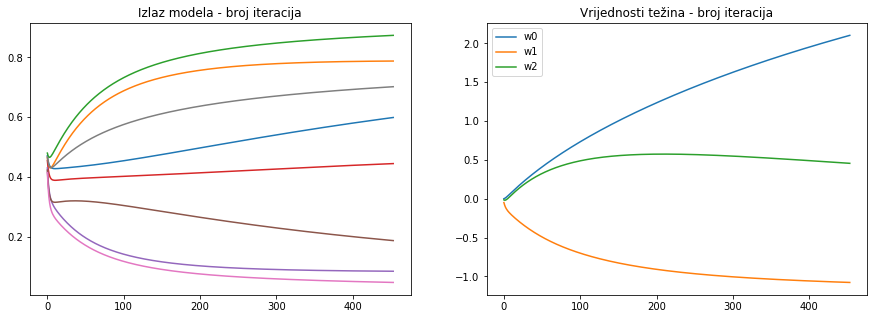

In [79]:
w, w_list = lr_train(unsep_X, unsep_y, trace=True)

h_list = []

for weights in w_list:
    h_unsep = []
    for i in range(shape(unsep_y)[0]):
        h_unsep.append(lr_h(unsep_X[i], weights))
    h_list.append(h_unsep)

h_array = np.array(h_list)

figure(figsize=(15, 5))

subplot(1, 2, 1)
for i in range(shape(h_array)[1]):
    plot(np.arange(shape(h_array)[0]), h_array[:, i])
title('Izlaz modela - broj iteracija')

subplot(1, 2, 2)
for i in range(shape(w_list)[1]):
    plot(np.arange(shape(w_list)[0]), w_list[:, i], label='w%s' % i)
title('Vrijednosti težina - broj iteracija')
legend()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [80]:
from numpy.linalg import norm

In [81]:
poly = PolynomialFeatures(1)
fi = poly.fit_transform(seven_X)
w1, w_list1 = lr_train(seven_X, seven_y, trace=True, alpha=0)
w2, w_list2 = lr_train(seven_X, seven_y, trace=True, alpha=1)
w3, w_list3 = lr_train(seven_X, seven_y, trace=True, alpha=10)
w4, w_list4 = lr_train(seven_X, seven_y, trace=True, alpha=100)

Broj iteracija:  947
Broj iteracija:  804
Broj iteracija:  405
Broj iteracija:  4


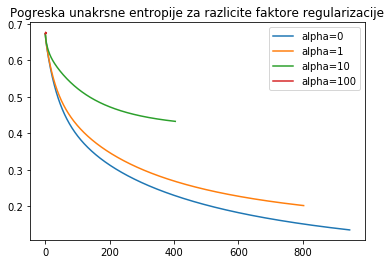

In [82]:
def compute_cross_entropy_error(w_list):
    err = []
    for i in range(len(w_list)):
        err.append(cross_entropy_error(seven_X, seven_y, w_list[i]))
    return err

err1 = compute_cross_entropy_error(w_list1)
err2 = compute_cross_entropy_error(w_list2)
err3 = compute_cross_entropy_error(w_list3)
err4 = compute_cross_entropy_error(w_list4)
    
plot(np.arange(len(w_list1)), err1, label='alpha=0')
plot(np.arange(len(w_list2)), err2, label='alpha=1')
plot(np.arange(len(w_list3)), err3, label='alpha=10')
plot(np.arange(len(w_list4)), err4, label='alpha=100')

title('Pogreska unakrsne entropije za razlicite faktore regularizacije')
legend()
show()

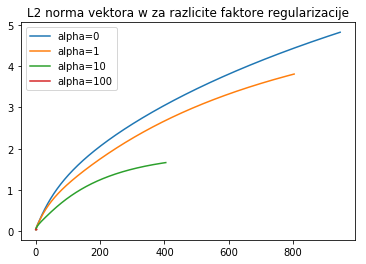

In [83]:
def second_norm(w_list):
    l2_norm = []
    
    for weights in w_list:
        norm = 0
        for w in weights:
            norm += w ** 2
        l2_norm.append(sqrt(norm))
    return l2_norm

l2_norm1 = second_norm(w_list1)
l2_norm2 = second_norm(w_list2)
l2_norm3 = second_norm(w_list3)
l2_norm4 = second_norm(w_list4)
    
plot(np.arange(len(l2_norm1)), l2_norm1, label='alpha=0')
plot(np.arange(len(l2_norm2)), l2_norm2, label='alpha=1')
plot(np.arange(len(l2_norm3)), l2_norm3, label='alpha=10')
plot(np.arange(len(l2_norm4)), l2_norm4, label='alpha=100')

title('L2 norma vektora w za razlicite faktore regularizacije')
legend()
show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2)

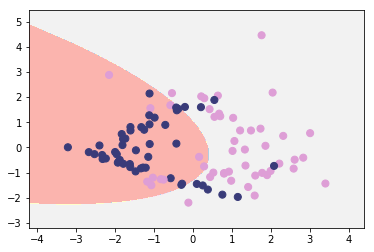

In [85]:
poly1 = PolynomialFeatures(2)
fi1 = poly1.fit_transform(X)
clf1 = LogisticRegression(solver='lbfgs').fit(fi1, y)
mlutils.plot_2d_clf_problem(X, y, lambda x : clf1.predict(poly1.fit_transform(x)))

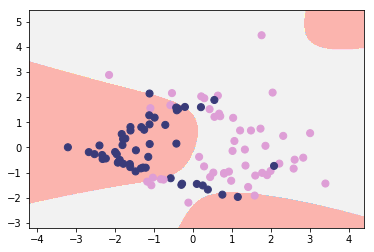

In [86]:
poly2 = PolynomialFeatures(3)
fi2 = poly2.fit_transform(X)
clf2 = LogisticRegression(solver='lbfgs').fit(fi2, y)
mlutils.plot_2d_clf_problem(X, y, lambda x : clf2.predict(poly2.fit_transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?